# Computational Programming with Python
### Lecture 7: More on arrays, more on functions


### Center for Mathematical Sciences, Lund University
Lecturer: Claus Führer, Malin Christersson, Robert Klöfkorn


## This lecture

- Showing more than one plot
- More about numpy arrays
- Boolean arrays
- Universal functions
- Images as matrices

# Showing more than one plot

Using matplotlib.pyplot, we can show many plots arranged in a grid using the command

```python
subplot(RowsColumnsPlotnumber)
```

where the argument is given as three consecutive numbers, e.g. `subplot(211)` (2 rows, 1 column, plot nr 1).

#### The imports needed

In [1]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

### Using 2 rows, 1 column

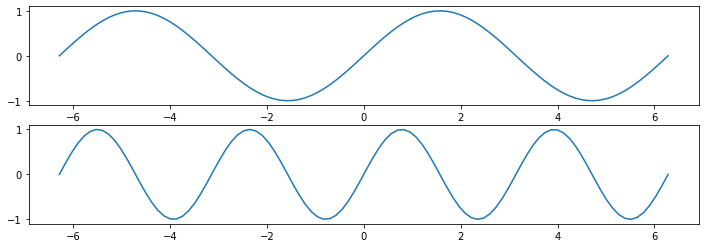

In [37]:
x = linspace(-2*pi, 2*pi, 100)
figure(figsize=(12, 4))
subplot(211) # also possible subplot(2,1,1)                
plot(x, sin(x))
subplot(212) # again, also possible subplot(2,1,2)
plot(x, sin(2*x))

## Using 1 row, 2 columns

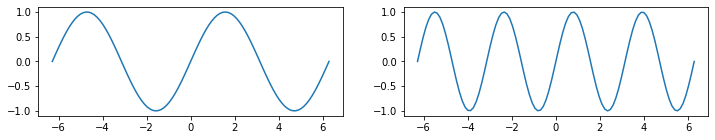

In [38]:
x = linspace(-2*pi, 2*pi, 100)
figure(figsize=(12, 2))
subplot(121) # also possible subplot(1,2,1)               
plot(x, sin(x))
subplot(122) # also possible subplot(1,2,2)
plot(x, sin(2*x))

## Using 2 rows, 3 columns

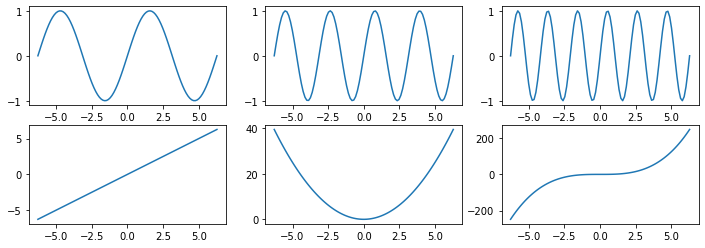

In [40]:
x = linspace(-2*pi, 2*pi, 100)
figure(figsize=(12, 4)) # width and height in inches
subplot(231)                
plot(x, sin(x))
subplot(232)
plot(x, sin(2*x))
subplot(233)
plot(x, sin(3*x))
subplot(234)                
plot(x, x)
subplot(235)
plot(x, x**2)
subplot(236)
plot(x, x**3)

# More about numpy arrays

We can compare the built-in function `range`  with the `numpy` functions `linspace` and `arange`.

```python
range(start, stop, step)  # only integers, stop not included
linspace(start, stop, number_of_numbers) # stop included
arange(start, stop, step)                # stop not included
```


In [5]:
x1 = arange(0, 10, 2)
print(x1)

x2 = arange(0., 10, 2)  # one dot to make floats
print(x2)

x3 = arange(0, 3, 0.5)  
print(x3)

[0 2 4 6 8]
[0. 2. 4. 6. 8.]
[0.  0.5 1.  1.5 2.  2.5]



## Solving simultanous linear equations

If $A$ is a matrix and $b$ is a vector, you solve the linear equation
$$A\cdot x = b$$
using `solve`, which has the syntax `x=solve(A, b)`.

### Example

We want to solve

$$ 
\begin{cases}
x_1 + 2x_2 &= 1\\
3x_1 + 4x_2 &= 4
\end{cases}
$$

In [41]:
from numpy import *
from scipy.linalg import solve

A = array([[1., 2.], 
           [3., 4.]])
b = array([1., 4.])
x = solve(A,b)
print("x =", x)
print(dot(A, x))     # should be almost b 

x = [ 2.  -0.5]
[1. 4.]



## Slices
Slices are similar to that of lists and vectors **except** that there are now **two dimensions**.

`M[i,:]` a vector filled by the row $i$ of $M$.

`M[:,j]` a vector filled by the column $j$ of $M$.

`M[2:4,:]` slice 2:4 on the rows only

`M[2:4,1:4]`slice on rows and columns

## Slices &hyphen; omitting a dimension

If you omit an index, Numpy assumes you are taking rows only.

`M[3]` is the third row of $M$

`M[1:3]` is a matrix with the second and third rows of $M$

### Slices, examples

In [44]:
M = array([[1, 2, 3, 4],
           [10, 20, 30, 40],
           [100, 200, 300, 400]])

print(M[2,:])      # row 2
print(M[:,2],"\n")      # column 2

print(M[:, 1:3],"\n")   # slice on columns

print(M[0:2])      # omitting a dimension  

[100 200 300 400]
[  3  30 300] 

[[  2   3]
 [ 20  30]
 [200 300]] 

[[ 1  2  3  4]
 [10 20 30 40]]


## Some technical terms

There are three *attributes* `ndim`, `shape` and `size` that can be used on an array.

In [45]:
M = array([[1, 2, 3, 4],
           [10, 20, 30, 40],
           [100, 200, 300, 400]])

print("dimension = ", M.ndim)  # the tensor dimension
print("shape = ", M.shape)     # M is a 3 times 4 matrix
print("size =", M.size)        # the total number of elements

dimension =  2
shape =  (3, 4)
size = 12



## Dimensions of matrix slices

| access | ndim | kind | example |
|:---- | :---: | :--- | :--- |
|index, index | 0 | scalar | `M[2, 0]` |
|slice:index | 1 | vector | `M[1, :]` |
|slice: slice| 2 | matrix | `M[0:2, 2:3]` |


#### Example 1

Make a slice for the red elements. What is the dimension of the slice?
$$
M = 
\begin{pmatrix}
0 & \color{red}{\begin{matrix} 1 & 2 & 3 \end{matrix}} \\
4 & \color{red}{\begin{matrix} 5 & 6 & 7 \end{matrix}} \\
8 & \begin{matrix} 9 & 10 & 11 \end{matrix}
\end{pmatrix}
$$

#### Example 2

Make a slice for the red elements. What is the dimension of the slice?
$$
M = 
\begin{pmatrix}
0 & \begin{matrix} 1 & 2 \end{matrix} & 3 \\
4 & \begin{matrix} 5 & 6 \end{matrix} & 7 \\
8 & \color{red}{\begin{matrix} 9 & 10 \end{matrix}} & 11
\end{pmatrix}
$$

In [51]:
M = array([[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]])
M1 = M[0:2,1:4]
print(M1)
print(M1.ndim)

M2 = M[2,1:3]
print(M2)
print(M2.ndim)

[[1 2 3]
 [5 6 7]]
2
[ 9 10]
1


## Altering a matrix

You may alter a matrix using slices and direct access.
```python
M[2, 3] = 2  # don't use M[2][3] = 2
M[2, :] = some_vector
M[1:3, :] = some_matrix
M[1:4; 2:5] = some_matrix
``` 
The matrices and vectors above **must have the right size** to "fit" in the matrix $M$.

## Reshaping

From a given tensor (vector or matrix or higher dimension tensor) one may obtain a new tensor by **reshaping**.

In [10]:
A = arange(12)
print(A)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [11]:
A1 = A.reshape(3, 4)
print(A1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [12]:
%%script python --no-raise-error
A2 = A.reshape(2, 3) # error

Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
NameError: name 'A' is not defined


## Reshaping trick

Python can guess one of the dimensions. Give a negative index for the dimension to be guessed.

In [13]:
A = arange(12)
print(A)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [14]:
A1 = A.reshape(4, -1)
print(A1)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [15]:
%%script python --no-raise-error
A2 = A.reshape(5, -1) # error

Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
NameError: name 'A' is not defined


## Building matrices

- `hstack` to stack matrices **h**orizontally
- `vstack` to stack matrices **v**ertically
- `column_stack` to stack vectors in **columns**

In [52]:
v0 = array([1, 2])
v1 = array([3, 4])

M1 = vstack([v0, v1])       # the argument is a list of vectors
M2 = column_stack([v0, v1]) # the argument is a list of vectors

print(M1)
print(M2)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


## Methods `sum()`, `max()`, `min()`

In [17]:
A = array([[1, 2, 3, 4],[5, 6, 7, 8]])
a_sum = A.sum()
a_max = A.max()
row_max = A[0].max()
print("sum = ", a_sum)
print("maximum of A = ", a_max)
print("maximum of first row = ", row_max)

sum =  36
maximum of A =  8
maximum of first row =  4


# Boolean arrays

In [18]:
B1 = array([[True, False],
           [False, True]])
print(B1)

B2 = full((3, 4), False)
print(B2)

[[ True False]
 [False  True]]
[[False False False False]
 [False False False False]
 [False False False False]]


## Using Boolean arrays

One may use Boolean arrays to create a "template" for modifying another array:

In [54]:
B = array([[True, False], 
           [False, True]])   # the template array

M = array([[2, 3],
           [1, 4]])    # the other array

M[B] = 0 # using the template
print(M, "\n")

M[B] = 10, 20
print(M)

[[0 3]
 [1 0]] 

[[10  3]
 [ 1 20]]


## Creating  Boolean arrays

A comparison operator operating on an array(s), will create a Boolean array.

In [20]:
M = array([[2, 3],
           [1, 4]]) 
B1 = M > 2
B2 = M == 4
print(B1)
print(B2)

[[False  True]
 [False  True]]
[[False False]
 [False  True]]


## Creating and using Boolean arrays

In [58]:
M = array([[2, 3],
           [1, 4]]) 
B1 = M > 2  # creating a template
M[B1] = 0    # using the template
print(M)

[[2 0]
 [1 0]]


We don't have to create a template variable B:

In [59]:
M = array([[2, 3],
           [1, 4]]) 

M[M>2] = 0    # creating a template and using it
print(M)

[[2 0]
 [1 0]]


## Comparing arrays

In [61]:
M1 = array([[2, 3],
            [1, 4]]) 
M2 = array([[0, 5],
            [2, 3]])

B = M2 < M1
print(B)

C = M2 == M1
print(C)

[[ True False]
 [False  True]]
[[False False]
 [False False]]


## Array equality

Because array comparison create Boolean arrays, we need some method for checking equality. We can use the methods `all` or `any`.

In [24]:
A = array([[1,2],[3,4]])
B = array([[1,2],[3,3]])

equal1 = (A == B).all()
equal2 = (A != B).any()

print("equal1 =", equal1)
print("equal2 =", equal1)

equal1 = False
equal2 = False


## Boolean operators for arrays

We cannot use `and`,`or`, `not`, for Boolean arrays. Instead we use following operators:

- and: `A & B`
- or: &nbsp;  `A | B`
- not: `~A` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  (the tilde symbol)

In [25]:
a = array([True, True, False, False]) 
b = array([True, False, True, False])

print(a & b)
print(a | b)
print(~a)

[ True False False False]
[ True  True  True False]
[False False  True  True]


# Universal functions

### Definition
A universal function (or ufunc) is a function that operates on arrays in an element-by-element fashion. That is, a ufunc is a "vectorized" wrapper for a function that takes a fixed number of scalar inputs and produces a fixed number of scalar outputs.

### Example

In [62]:
x = arange(0, 2*pi, pi/2)
y = sin(x) # the numpy function sin is a ufunc
print(x)
print(y)

[0.         1.57079633 3.14159265 4.71238898]
[ 0.0000000e+00  1.0000000e+00  1.2246468e-16 -1.0000000e+00]


## Vectorized functions

Non-universal functions can be wrapped to behave like universal funtions. This is done by the command `vectorize`.

y1 = 1


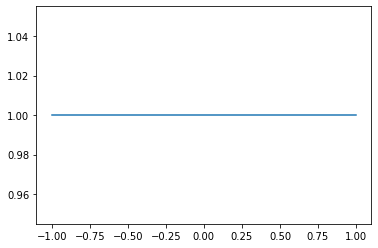

In [65]:
# A non-universal function
def const(x):
    return 1

x = linspace(-1, 1, 100)
y1 = const(x)
print("y1 =", y1)

vconst = vectorize(const)
y2 = vconst(x)
plot(x, y2)

## Another vectorised example

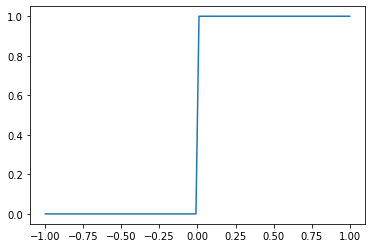

In [28]:
# A non-universal function
def heaviside(x): # named after Oliver Heaviside
    if x >= 0:
        return 1
    else:
        return 0

x = linspace(-1, 1, 100)
plot(x, vectorize(heaviside)(x))    # note: the plot is not correct

# Images as matrices

For demonstration purposes, we can use an image of a racoon provided by scipy.

M: <class 'numpy.ndarray'>
M.shape = (768, 1024)
dtype = uint8


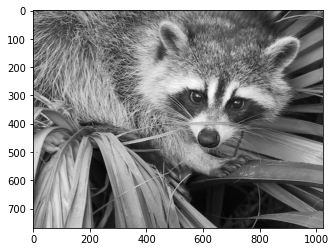

In [29]:
import scipy.misc
M = scipy.misc.face(gray = True)  # for starters, use a gray scale
print("M:", type(M))
print("M.shape =", M.shape)
print("dtype =", M.dtype)
imshow(M, cmap='gray')   # use a gray scale color map (cmap)                   

## Arithmetic operations

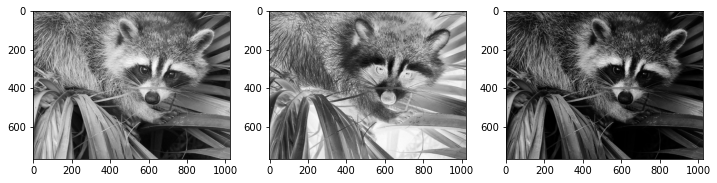

In [30]:
M = scipy.misc.face(gray = True)
M1 = 255-M            # negative image
M2 = (M/255)**2*255   # quadratic function

figure(figsize=(12, 4)) # 12 inches wide and 4 inches high
subplot(131)
imshow(M, cmap='gray')
subplot(132)
imshow(M1, cmap='gray')
subplot(133)
imshow(M2, cmap='gray', vmin = 0, vmax = 255)

## Slices

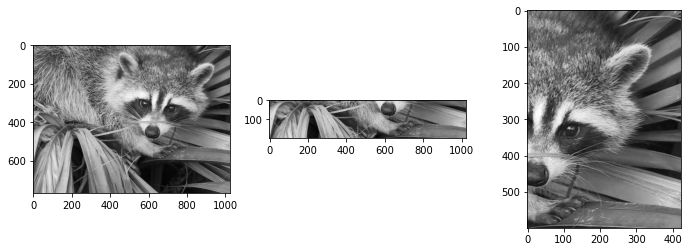

In [31]:
M = scipy.misc.face(gray = True)
M1 = M[400:600, :]
M2 = M[:600, 600: ]

figure(figsize=(12, 4))
subplot(131)
imshow(M, cmap='gray')
subplot(132)
imshow(M1, cmap='gray')
subplot(133)
imshow(M2, cmap='gray')

## Boolean arrays

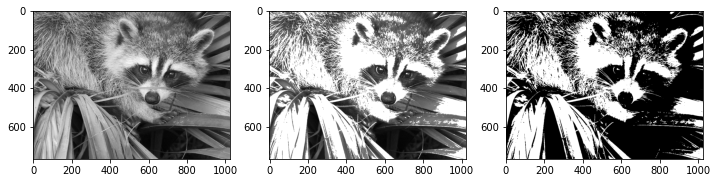

In [32]:
figure(figsize=(12, 4))
M = scipy.misc.face(gray = True)
subplot(131)
imshow(M, cmap='gray')

M[M>127] = 255
subplot(132)
imshow(M, cmap='gray')

M[M<=127] = 0
subplot(133)
imshow(M, cmap='gray')

## RGB images

M.shape = (768, 1024, 3)
M.ndim = 3
dtype = uint8
M[0, 0] = [121 112 131]


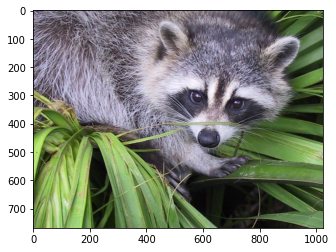

In [66]:
M = scipy.misc.face()
print("M.shape =", M.shape)
print("M.ndim =", M.ndim)
print("dtype =", M.dtype)
print("M[0, 0] =", M[0, 0])

imshow(M)

## Slices

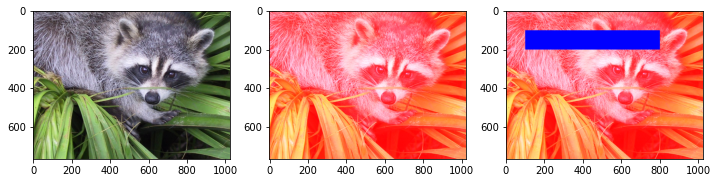

In [34]:
# M = scipy.misc.face().copy()  # must make a copy to change it
M = scipy.misc.face().copy()

figure(figsize=(12, 4))
subplot(131)
imshow(M)

M[:, :, 0] = 255  # maximize red for each pixels
subplot(132)
imshow(M)

#                       R  G   B
M[100: 200, 100:800] = [0, 0, 255]  # make a blue rectangle  
# try RGB with programs like gimp or inkscape
subplot(133)
imshow(M)

## Comparison and Boolean operators

(768, 1024, 3)
(768, 1024)


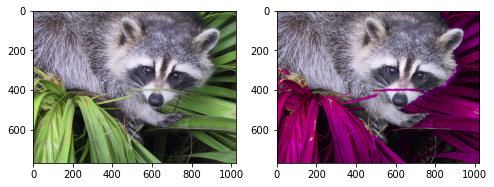

In [35]:
M = scipy.misc.face().copy()  # must make a copy to change it

figure(figsize=(8, 4))
subplot(121)
imshow(M)

# [ R, G , B]
g_larger_than_r = M[:, :, 1] > M[:, :, 0]
g_larger_than_b = M[:, :, 1] > M[:, :, 2]
g_larger_than_both = g_larger_than_r & g_larger_than_b
print(M.shape)
print(g_larger_than_both.shape)

M[g_larger_than_both, 1] = 0  # remove green from mostly green pixels
subplot(122)
imshow(M)

## Other images

Use Python Image Library, PIL.

(599, 402, 3)


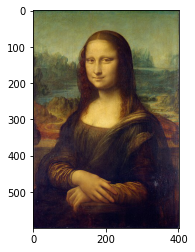

In [36]:
from PIL import Image

img = Image.open("images/MonaLisa.jpg") # a local file in the directory images
ML = array(img)  # make a numpy array that can be manipulated
print(ML.shape)
imshow(ML)

### Exercise: Try this with an image of your choice!